<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/016_TF_2_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm

class Encoder(tf.keras.Model):
    def __init__(self):
        super(Encoder, self).__init__()
        self.dense_1 = tf.keras.layers.Dense(128, activation='tanh')
        self.dense_2 = tf.keras.layers.Dense(64 , activation='tanh')
        self.dense_3 = tf.keras.layers.Dense(32 , activation='tanh')
        self.dense_4 = tf.keras.layers.Dense(2  , activation='sigmoid')
    def call(self, x, training=False):
        out = self.dense_1(x)
        out = self.dense_2(out)
        out = self.dense_3(out)
        out = self.dense_4(out)
        return out


class Decoder(tf.keras.Model):
    def __init__(self):
        super(Decoder, self).__init__()
        self.dense_1 = tf.keras.layers.Dense(16 , activation='tanh')
        self.dense_2 = tf.keras.layers.Dense(64 , activation='tanh')
        self.dense_3 = tf.keras.layers.Dense(128, activation='tanh')
        self.dense_4 = tf.keras.layers.Dense(784, activation='sigmoid')
    def call(self, x, training=False):
        out = self.dense_1(x)
        out = self.dense_2(out)
        out = self.dense_3(out)
        out = self.dense_4(out)
        return out

In [2]:
class Autoencoder(tf.keras.Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    def call(self, x, training=False):
        out = self.encoder(x, training)
        out = self.decoder(out, training)
        return out

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = np.reshape(X_train, (-1, 784)) / 255.

batch_size = 512
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model = Autoencoder()
sample = np.reshape(X_test[:5], (5, 784))

11493376/11490434 [==============================] - 0s 0us/step


=>    0 loss 0.2308
=>  200 loss 0.0660
=>  400 loss 0.0680
=>  600 loss 0.0683
=>  800 loss 0.0604
=> 1000 loss 0.0544
=> 1200 loss 0.0530
=> 1400 loss 0.0521
=> 1600 loss 0.0496
=> 1800 loss 0.0477
=> 2000 loss 0.0463
=> 2200 loss 0.0456
=> 2400 loss 0.0428
=> 2600 loss 0.0431
=> 2800 loss 0.0409
=> 3000 loss 0.0404
=> 3200 loss 0.0394
=> 3400 loss 0.0390
=> 3600 loss 0.0383
=> 3800 loss 0.0391
=> 4000 loss 0.0378
=> 4200 loss 0.0382
=> 4400 loss 0.0367
=> 4600 loss 0.0376
=> 4800 loss 0.0377
=> 5000 loss 0.0383
=> 5200 loss 0.0367
=> 5400 loss 0.0366
=> 5600 loss 0.0364
=> 5800 loss 0.0368
=> 6000 loss 0.0362
=> 6200 loss 0.0371
=> 6400 loss 0.0362
=> 6600 loss 0.0360
=> 6800 loss 0.0368
=> 7000 loss 0.0359
=> 7200 loss 0.0357
=> 7400 loss 0.0348
=> 7600 loss 0.0360
=> 7800 loss 0.0368
=> 8000 loss 0.0359
=> 8200 loss 0.0354
=> 8400 loss 0.0348
=> 8600 loss 0.0361
=> 8800 loss 0.0358
=> 9000 loss 0.0351
=> 9200 loss 0.0348
=> 9400 loss 0.0344
=> 9600 loss 0.0340
=> 9800 loss 0.0349


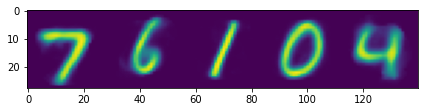

In [4]:
for step in range(10000):
    true_image = X_train[np.random.choice(X_train.shape[0], batch_size)]
    with tf.GradientTape() as tape:
        pred_image = model(true_image, training=True)
        loss = tf.reduce_mean(tf.square(pred_image-true_image))
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    if step % 200  == 0: print("=> %4d loss %.4f" %(step, loss))
    if step % 1000 == 0:
        pred_image = model(sample, training=False)
        pred_image = np.reshape(pred_image, (5, 28, 28))
        show_image = np.concatenate(pred_image[:5], -1)
        plt.tight_layout()
        plt.imshow(show_image)
        plt.savefig("%d.png" %((step+1) // 2000))

In [5]:
print(y_test[:5])

[7 2 1 0 4]


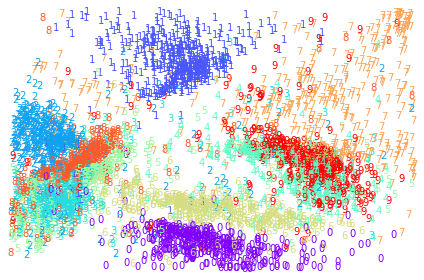

In [7]:
sample = np.reshape(X_test[:5000], (5000, 784))
label = y_test[:5000]
embeddings = model.encoder(sample, training=False)

fig,ax = plt.subplots()
X, Y = embeddings[:,0].numpy(), embeddings[:,1].numpy()
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
for x,y,l in zip(X,Y,label):
    c = cm.rainbow(int(255 *l/ 9)) #设置颜色
    ax.text(x, y, l, color=c)
    # plt.plot(x,y, '.', c=c)
plt.axis('off')
#plt.legend()
plt.tight_layout()
plt.savefig("embedding.png")
plt.show()

In [8]:
embeddings.shape

TensorShape([5000, 2])

In [9]:
embeddings[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.8410853 , 0.6669387 ],
       [0.27356368, 0.30557582],
       [0.38705438, 0.8797482 ],
       [0.41898122, 0.13395822],
       [0.747064  , 0.27776507]], dtype=float32)>